<a href="https://colab.research.google.com/github/bhanupratap123/Basics/blob/master/Analysis_using_Pivot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
sns.set()

In [1]:
#Birth rate Data

!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   990k      0 --:--:-- --:--:-- --:--:--  990k


In [5]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [32]:
#lets add decade columns and take look at Male And Female Birth
births['Decade'] = 10 * (births['year']//10)
births.pivot_table('births',index = 'Decade',columns='gender',aggfunc=np.sum)

gender,F,M
Decade,,
1960,1752836,1845742
1970,16260348,17118785
1980,16336507,17171290


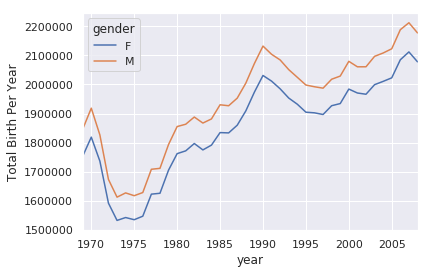

In [14]:
#Visualisation of Trends
births.pivot_table('births',index = 'year',columns = 'gender',aggfunc='sum').plot()
plt.ylabel('Total Birth Per Year');


In [0]:
#Data Exploration

quartiles = np.percentile(births['births'],[25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [0]:
#we can use Query method to filter out rows with births outside these values

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [0]:
#set Day Columns to integer ; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [0]:
#Create date Time index from the Year, month ,Day

births.index = pd.to_datetime(10000 * births['year'] + 100 * births['month'] + births['day'],format = '%Y%m%d')

births['dayofweek'] = births.index.dayofweek

Text(0, 0.5, 'mean birth by day')

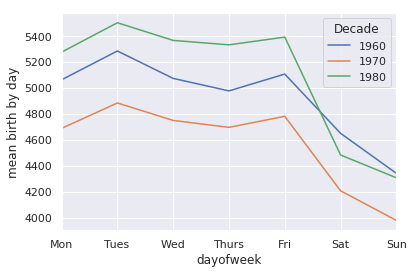

In [33]:
births.pivot_table('births', index = 'dayofweek',columns = 'Decade',aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.ylabel('mean birth by day')

In [36]:
births_by_date = births.pivot_table('births',[births.index.month,births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [42]:
births_by_date.index = [pd.datetime(2012,month,day) for (month,day) in births_by_date.index]
#births_by_date.head()

TypeError: ignored